# Pneumonia

> Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

> Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.


![](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg)

> #### Pneumonia is the world’s leading cause of death amongchildren under 5 years of age, accounting for 16% of alldeaths of children under 5 years old killing approximately 2,400 children a day in 2015. There are 120 million episodes of pneumonia per year in children under 5, over 10% of which (14 million) progress to severe episodes. There was an estimated 880,000 deaths from pneumonia in children under the age of five in 2016. Most were less than 2 years of age

# Image Classification Steps
![](https://i.imgur.com/6knLqiN.png)

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [2]:
import numpy as np 
import pandas as pd 
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import helper
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns

import warnings
import os
warnings.filterwarnings('ignore')

from torch import nn, optim
from torchvision import transforms, models, datasets

from fastai.callbacks import *
from sklearn.metrics import roc_curve, auc
from fastai.vision import *
sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')

print(os.listdir("../input"))



['chest_xray']


In [3]:
data_dir = '../input/chest_xray/chest_xray'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'

# Transform to normalize the data
> When you load in the data with ImageFolder, you need to define some transforms. The images are different size but we'll need them to all be the same size for training. We'll also need to convert the images to tensors.

In [4]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
                                    
valid_transforms = transforms.Compose([transforms.Resize(254),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

trainset = datasets.ImageFolder(train_dir,transform=train_transforms)
validset = datasets.ImageFolder(valid_dir,transform=valid_transforms )
testset = datasets.ImageFolder(test_dir,transform=valid_transforms )




# Load the data
> With the ImageFolder loaded, you have to pass it to a DataLoader. The DataLoader takes a dataset and returns batches of images and the corrresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64)


# Visualize the Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


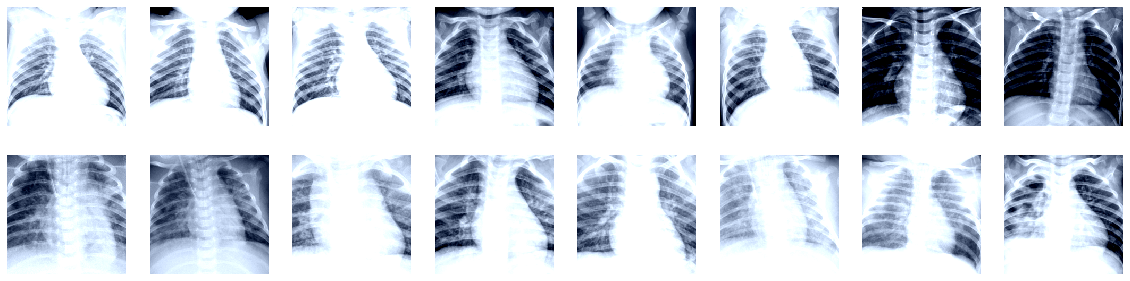

In [6]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1,2,0)));
    
dataiter = iter(validloader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(20,5))

for idx in np.arange(16):
    ax = fig.add_subplot(2, 16/2, idx+1, xticks=[], yticks=[]);
    imshow(images[idx]);
print(labels)  

# Causes

![](https://i.imgur.com/jZqpV51.png)

> Many germs can cause pneumonia. The most common are bacteria and viruses in the air we breathe. Your body usually prevents these germs from infecting your lungs. But sometimes these germs can overpower your immune system, even if your health is generally good.

> Pneumonia is classified according to the types of germs that cause it and where you got the infection.

* **Bacteria** - The most common cause of bacterial pneumonia in the U.S. is Streptococcus pneumoniae. This type of pneumonia can occur on its own or after you've had a cold or the flu. It may affect one part (lobe) of the lung, a condition called lobar pneumonia.

* **Bacteria-like organisms** - Mycoplasma pneumoniae also can cause pneumonia. It typically produces milder symptoms than do other types of pneumonia. Walking pneumonia is an informal name given to this type of pneumonia, which typically isn't severe enough to require bed rest.

* **Fungi.** - Mycoplasma pneumoniae also can cause pneumonia. It typically produces milder symptoms than do other types of pneumonia. Walking pneumonia is an informal name given to this type of pneumonia, which typically isn't severe enough to require bed rest.

* **Viruses** - Some of the viruses that cause colds and the flu can cause pneumonia. Viruses are the most common cause of pneumonia in children younger than 5 years. Viral pneumonia is usually mild. But in some cases it can become very serious.

# Let's check if cuda is available

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Transfer Learning Using Resnet34

In [8]:
model = models.resnet34(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 82574720.69it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [9]:
for param in model.parameters():
    param.requires_grad = False

classifier = nn.Sequential(nn.Linear(512, 200),
                           nn.ReLU(),
                          nn.Dropout(p=0.5),
                          nn.Linear(200, 2),
                          nn.LogSoftmax(dim=1))
model.fc = classifier
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device);

In [10]:
def validation(model, validloader, criterion):
    model.to(device)
    valid_loss = 0
    accuracy = 0
    for data in validloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        output = model.forward(images)
        valid_loss += criterion(output, labels).item()
        
        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return valid_loss, accuracy

# Let's train our model

In [11]:
epochs = 10
print_every = 20
steps = 0

model.to(device)

for e in range(epochs):
    model.train()
    running_loss = 0
    for ii, (images, labels) in enumerate(trainloader):
        steps += 1

        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            
            model.eval()
            
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                valid_loss, accuracy = validation(model, validloader, criterion)
                
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Valid Loss: {:.3f}.. ".format(valid_loss/len(validloader)),
                  "Valid Accuracy: {:.3f}".format(accuracy/len(validloader)))
            
            running_loss = 0
            
            # Make sure training is back on
            model.train()

Epoch: 1/10..  Training Loss: 0.673..  Valid Loss: 0.727..  Valid Accuracy: 0.500
Epoch: 1/10..  Training Loss: 0.431..  Valid Loss: 0.664..  Valid Accuracy: 0.625
Epoch: 1/10..  Training Loss: 0.395..  Valid Loss: 0.611..  Valid Accuracy: 0.625
Epoch: 1/10..  Training Loss: 0.355..  Valid Loss: 0.566..  Valid Accuracy: 0.688
Epoch: 2/10..  Training Loss: 0.301..  Valid Loss: 0.604..  Valid Accuracy: 0.750
Epoch: 2/10..  Training Loss: 0.320..  Valid Loss: 0.742..  Valid Accuracy: 0.625
Epoch: 2/10..  Training Loss: 0.330..  Valid Loss: 0.668..  Valid Accuracy: 0.688
Epoch: 2/10..  Training Loss: 0.338..  Valid Loss: 0.877..  Valid Accuracy: 0.625
Epoch: 3/10..  Training Loss: 0.244..  Valid Loss: 0.518..  Valid Accuracy: 0.750
Epoch: 3/10..  Training Loss: 0.307..  Valid Loss: 0.628..  Valid Accuracy: 0.750
Epoch: 3/10..  Training Loss: 0.301..  Valid Loss: 0.478..  Valid Accuracy: 0.750
Epoch: 3/10..  Training Loss: 0.296..  Valid Loss: 0.878..  Valid Accuracy: 0.625
Epoch: 4/10..  T

# Testing our model

In [12]:
model.eval()
    
with torch.no_grad():
    _, accuracy = validation(model, testloader, criterion)
                
print("Test Accuracy: {:.2f}%".format(accuracy*100/len(testloader)))

Test Accuracy: 84.64%


# FastAi

In [13]:
path = Path('../input/chest_xray/chest_xray/')
np.random.seed(42)

data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, ds_tfms=get_transforms(),size=224, bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (4685 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Valid: LabelList (1171 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Test: None

In [14]:
data.classes

['NORMAL', 'PNEUMONIA']

# Visualize the Image

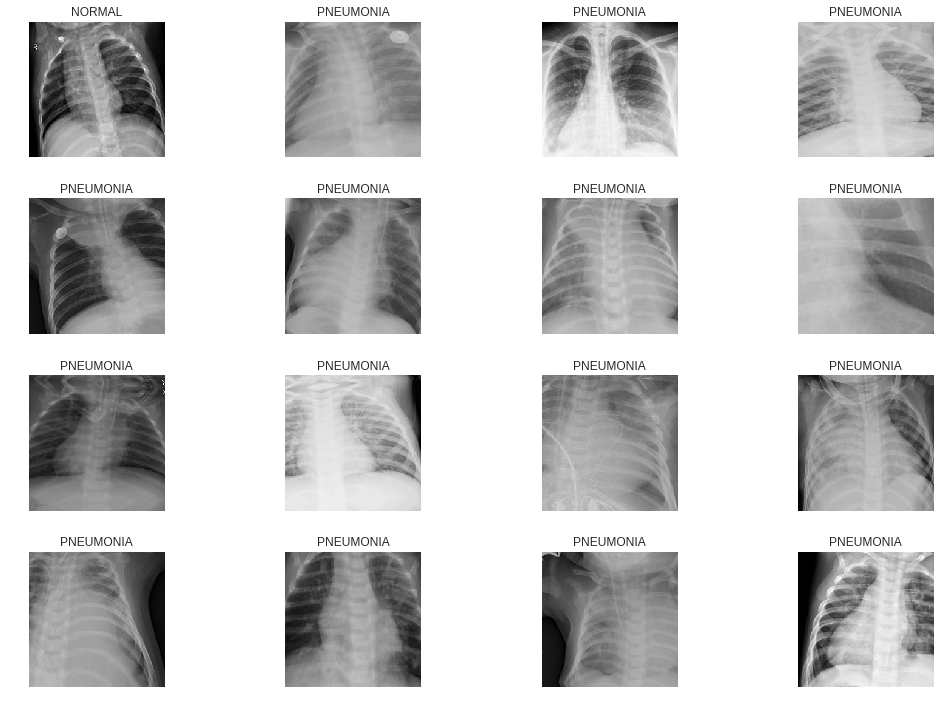

In [15]:
data.show_batch(4, figsize=(15,10))

# Transfer Learning Using Resnet34

In [16]:
learn = create_cnn(data, models.alexnet, ps=0.5, model_dir="/tmp/model/", metrics=error_rate)
learn

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /tmp/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:02, 84062329.22it/s]


Learner(data=ImageDataBunch;

Train: LabelList (4685 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Valid: LabelList (1171 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), st

# Training the model
You can see that we have an overfitting because of our error rate decrease then increase


epoch,train_loss,valid_loss,error_rate,time
0,0.300456,0.223412,0.076857,03:40
1,0.234337,0.195964,0.074295,03:32
2,0.204055,0.216809,0.076857,03:27
3,0.178688,0.141915,0.054654,03:30
4,0.164726,0.165259,0.064048,03:29
5,0.160701,0.138602,0.052092,03:29


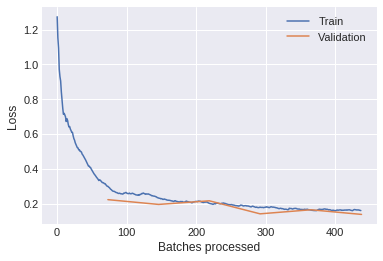

In [17]:
learn.fit_one_cycle(6, 1e-2)
learn.recorder.plot_losses()
plt.show()

# Fine Tuning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
1.096478196143185e-06


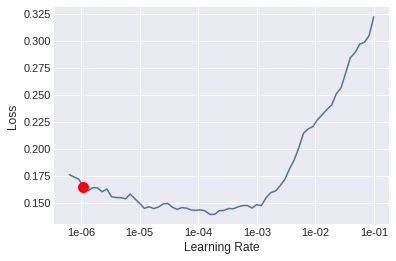

In [18]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
Learning_rate = learn.recorder.min_grad_lr
print(Learning_rate)
plt.show()

### Still Overfitting

In [19]:
learn.fit_one_cycle(3, Learning_rate)

plt.show()

epoch,train_loss,valid_loss,error_rate,time
0,0.144048,0.134074,0.050384,03:24
1,0.145992,0.136859,0.050384,03:22
2,0.148947,0.137957,0.052092,03:24


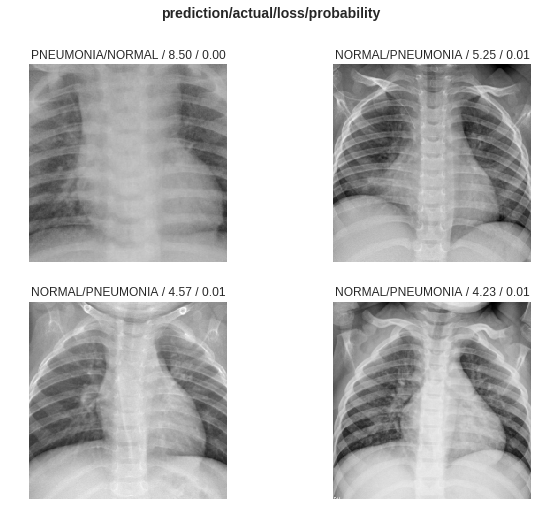

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(10,8), heatmap=False)
plt.show()

# Save the model

In [21]:
learn.save('pneumonia-model')

# Confusion Matrix

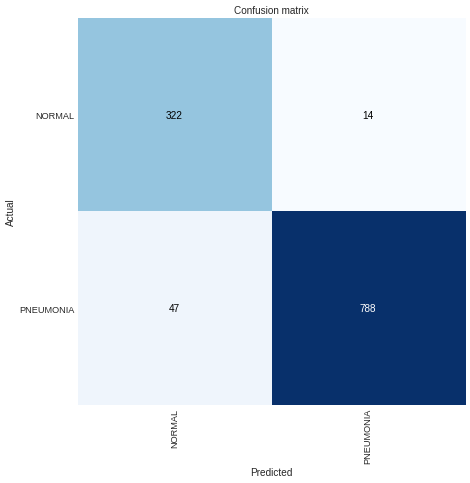

[('PNEUMONIA', 'NORMAL', 47), ('NORMAL', 'PNEUMONIA', 14)]

In [22]:
interp.plot_confusion_matrix(figsize=(10, 8), dpi=60)
plt.show()
interp.most_confused()

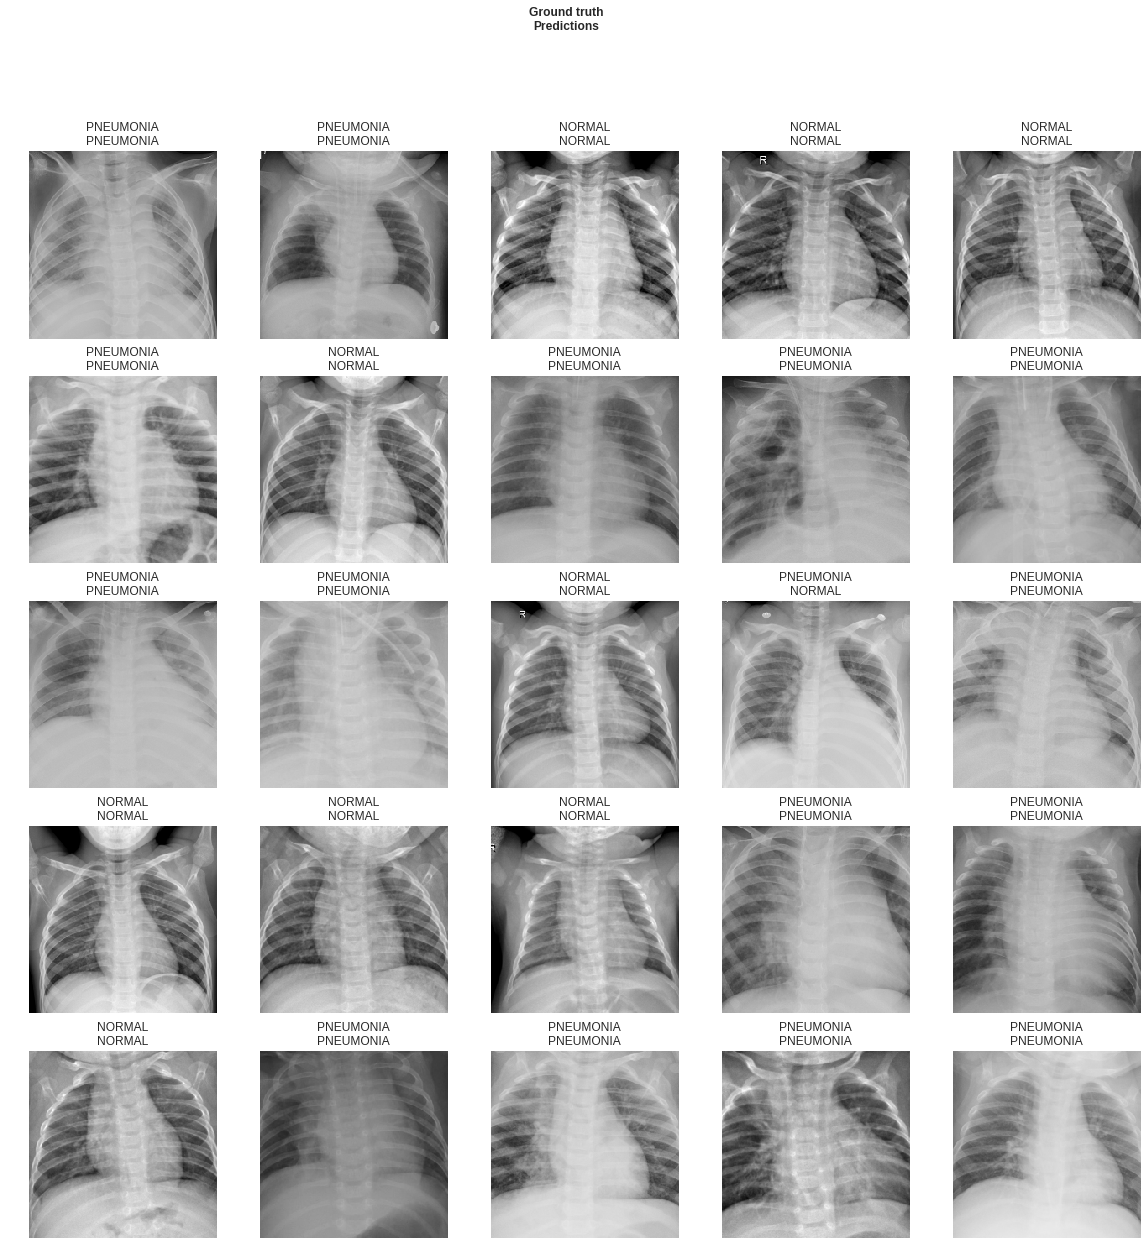

In [23]:
learn.show_results()

# Reference 

* [Pneumonia](https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204)
* [20 Pneumonia Facts](https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf)
* [Pytorch_Transfer_Learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
* [FastAi](https://docs.fast.ai/vision.models.html)
* [Transfer_Learning](https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e)